<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 13 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 8 April 2020</div>

# Building ANNs with Conx

In our last class we developed our own Artifical Neural Network (ANN), using feedfoward and backpropagation. There was a little bit of math involved. Thankfully, there are libraries to help with the math. Let's learn about a nice simple small one: `conx`.

We're going to leverage `Conx` to build discriminative neural networks, learn correlations, and predict dependent variables.

We first do a `pip install conx` on an anaconda terminal. If you can't, do a `!pip install conx` in this notebook.

In [9]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\liaoz\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
!pip install conx

In [10]:
import conx as cx

ConX, version 3.7.10


Just like `PyMC3`, it has a `Theano` dependency. 

`Conx` has some classical built-in datasets that you can directly leverage for training:

In [11]:
cx.Dataset.datasets()

['cifar10',
 'cifar100',
 'cmu_faces_full_size',
 'cmu_faces_half_size',
 'cmu_faces_quarter_size',
 'colors',
 'figure_ground_a',
 'fingers',
 'gridfonts',
 'mnist',
 'mnist_h5']

**Do not** try the below, it will take too long: 10 minutes or so to download the dataset (I know, I *tried*). Try it at home, if you want.

In [12]:
ds = cx.Dataset.get('mnist')
ds

11493376/11490434 [==============================] - ETA: 27 - ETA: 28 - ETA: 10 - ETA: 5 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 0us/step


**Dataset**: Unnamed Dataset

**Information**:
   * name    : None
   * length  : 70000

**Input Summary**:
   * shape  : (28, 28, 1)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (10,)
   * range  : (0, 1)



## R2D2 on two legs

<br />
<center>
<img src="ipynb.images/r2d22.png" width=300 />
</center>

Did you know R2D2 can raise one of its legs and actually walk on two legs?

Notice the shape of our data below: Inputs are clearly separated from the labels. We sense inputs from R2D2's two legs and learn whether to go forward or backward, just like in our previous lab (how did icome up with the data? It's a simple XOR dataset!).

We will build a network consisting of an input layer consisting of two nodes (for the two legs), a hidden layer consisting of 5 nodes this time instead of 4, and an output layer consisting again of one node. So, how many weights in total? That's the **complexity** of your network.

The node transfer function will be our good old friend the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). 

We load the data. We then compile our network the same way we compile a classic program. That sets up the matrices that will contain the weights and the adjacency matrix that will define our network graph. Let's see how to do this with `conx`:

In [13]:
dataset = [[[0, 0], [0]],
           [[0, 1], [1]],
           [[1, 0], [1]],
           [[1, 1], [0]]]

net = cx.Network("R2D2", 2, 5, 1, activation="sigmoid")
net.dataset.load(dataset)
net.compile(error='mean_squared_error', optimizer="sgd", lr=0.3, momentum=0.9)

C:\Users\liaoz\Anaconda3\lib\site-packages\keras\layers\core.py:690: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 2)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


We then ask for a summary of our network.

In [14]:
net.dataset.summary()

_________________________________________________________________
R2D2 Dataset:
Patterns    Shape                 Range                         
inputs      (2,)                  (0.0, 1.0)                    
targets     (1,)                  (0.0, 1.0)                    
Total patterns: 4
   Training patterns: 4
   Testing patterns: 0
_________________________________________________________________


For kicks, let's propagate a signal down our network and examine its *untrained* output.

In [15]:
net.propagate([0, 1])

[0.6976680159568787]

That means walk forward, R2D2!

We can even propagate *weird* (unexpected) signals (both R2D2 feet only *slightly* touching the ground?):

In [16]:
net.propagate([0.5, 0.5])

[0.6627212762832642]

Hmm.. probably backwards, R2D2!

We can sample the entire input space for the two input units:

Text(0.5, 1.0, 'Output Activation')

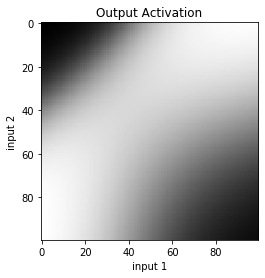

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
z = np.zeros((100, 100))

for x in range(100):
    for y in range(100):
        z[x][y] = net.propagate(input=[x/100, y/100])[0]

plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Output Activation")

In [29]:
We can even get a 照片 of our network, to verify we got it right.

SyntaxError: invalid syntax (<ipython-input-29-c1081ee9b80b>, line 1)


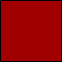
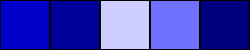
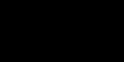

In [23]:
net.picture()

Ok, so we have ourselves two input nodes, 5 hidden nodes, and one output node!

Let's *learn*! Let's say 2000 epochs (timesteps), with the hyperparameters specified below. Note that we are very
demanding on our little network! We demand an accuracy of 100%!

In [30]:
net.train(2000, report_rate=10, accuracy=1.0)

No training required: accuracy already to desired value
Training dataset status:
       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#  677 |   0.00720 |   1.00000 


You should be able to see the network total error and accuracy as it trains.

The cell below is from an older API:

In [32]:
net.evaluate(show=True)

R2D2:
All Data Results:
--+--------------+--------+------+---------+-
  |              | target |      |         | 
# |        input | output | loss |     acc | 
--+--------------+--------+------+---------+-
0 | [0.00, 0.00] | [0.00] | 0.00 | correct | 
1 | [0.00, 1.00] | [1.00] | 0.01 | correct | 
2 | [1.00, 0.00] | [1.00] | 0.01 | correct | 
3 | [1.00, 1.00] | [0.00] | 0.01 | correct | 
--+--------------+--------+------+---------+-
Correct:                                 4 | 
-------------------------------------------+-
               loss:       0.01
                acc:       1.00
              Total:          4


In [33]:
net.propagate([1., 1.])

[0.09957296401262283]

Now let's propagate the same signals as before on our *trained* network.

In [34]:
net.propagate([0.5, 0.5])

[0.7275453209877014]

Now , it looks like R2D2 is confident enough to walk *forward* when it's two feet are only half-touching the ground!

And how about the training inputs?

In [35]:
#dataset = [[[0, 0], [0]],
#           [[0, 1], [1]],
#           [[1, 0], [1]],
#           [[1, 1], [0]]]

net.propagate([0, 0]), net.propagate([0, 1]), net.propagate([1, 0]), net.propagate([1, 1])

([0.06775636970996857],
 [0.9139854907989502],
 [0.9182835817337036],
 [0.09957296401262283])

<br />
<center>
<img src =ipynb.images/allright.gif width = 400 />
</center>

Allright allright allright! This is *fun*, let's build a more complicated network. Let's be more *explicit* about the layers.

## Example \#2

What network architecture is this below?

In [36]:
net2 = cx.Network("XOR2 Network")

net2.add(cx.Layer("input1", 1),
         cx.Layer("input2", 1),
         cx.Layer("hidden1", 10, activation="sigmoid"),
         cx.Layer("hidden2", 10, activation="sigmoid"),
         cx.Layer("shared-hidden", 5, activation="sigmoid"),
         cx.Layer("output1", 1, activation="sigmoid"),
         cx.Layer("output2", 1, activation="sigmoid"))

net2.connect("input1", "hidden1")
net2.connect("input2", "hidden2")
net2.connect("hidden1", "shared-hidden")
net2.connect("hidden2", "shared-hidden")
net2.connect("shared-hidden", "output1")
net2.connect("shared-hidden", "output2")

Let's compile our network.

In [37]:
net2.compile(loss='mean_squared_error', optimizer='SGD', lr=0.3, momentum=0.9)

C:\Users\liaoz\Anaconda3\lib\site-packages\keras\layers\core.py:690: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
C:\Users\liaoz\Anaconda3\lib\site-packages\keras\layers\core.py:690: UserWarning: `output_shape` argument not specified for layer lambda_3 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 1)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Let's picture it.


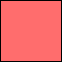
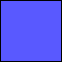
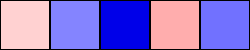
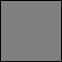
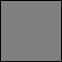

In [38]:
net2.picture()

So, two inputs, each going to its own hidden layer of 10 neurons, then to a shared hidden layer of 5 neurons, followed by an output layer of ywo neurons.
Let's propagate a signal into the *untrained* network.

In [39]:
net2.propagate([[1], [1]])

[[0.3455883264541626], [0.6576789617538452]]

Let's load a new dataset with the following inputs and desired outputs (labels).

We essentially just unfold our original label into 2 dimensions.

In [40]:
XOR2 = [
    ([[0],[0]], [[0],[0]]),
    ([[0],[1]], [[1],[1]]),
    ([[1],[0]], [[1],[1]]),
    ([[1],[1]], [[0],[0]])
]

In [41]:
net2.dataset.load(XOR2)

By the way, you can get the weight of any layer at any time. These are the *untrained* weights of the `hidden2` layer:

In [42]:
net2.get_weights("hidden2")

[[[0.5110691785812378,
   0.31661441922187805,
   -0.2282279133796692,
   0.5875000953674316,
   0.2744676172733307,
   0.193095862865448,
   -0.408339262008667,
   -0.2318386435508728,
   0.2139548361301422,
   -0.5267255902290344]],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

Let's *learn* our labels!

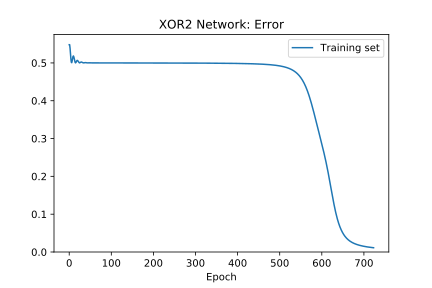

       |  Training |   output1 |   output2 
Epochs |     Error |       acc |       acc 
------ | --------- | --------- | --------- 
#  723 |   0.01127 |   1.00000 |   1.00000 


In [43]:
net2.train(epochs=2000, accuracy=1.0, report_rate=25)

We see it *took us some time* to learn. There was even a period of despair, where we werent; learning *anything*. But eventually, we converged!

We can even learn *by batches*.

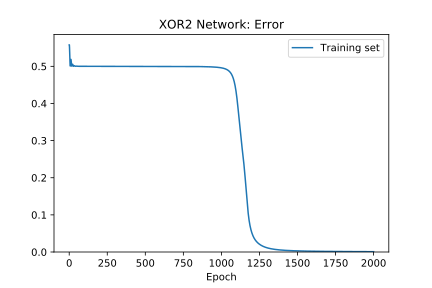

In [44]:
import time
net2.reset()
for i in range(20):
    (epoch_count, results) = net2.train(epochs=100, verbose=0, report_rate=25)
    for index in range(4):
        net2.propagate(XOR2[index][0])
        time.sleep(0.1)

## Example \#3

A dataset is a list of (input, target) pairs that can be further split into training and testing lists. We can build this dataset quite artificially, say with random numbers, or we can even build it with *mathematical transformations*.

Let's do a transformation. Let's build a network that will compute whether the number of 1's (*set* bits) in a set of 5 bits is **odd**. We will use a 5-10-1 network.

In [45]:
import conx as cx

net = cx.Network("Odd Network")
net.add(cx.Layer("input", 5))
net.add(cx.Layer("hidden", 10, activation="relu"))
net.add(cx.Layer("output", 1, activation="sigmoid"))
net.connect()
net.compile(error="mse", optimizer="adam")
net.summary()

C:\Users\liaoz\Anaconda3\lib\site-packages\keras\layers\core.py:690: UserWarning: `output_shape` argument not specified for layer lambda_6 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 5)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 5)                 0         
_________________________________________________________________
hidden (Dense)               (None, 10)                60        
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


#### List of (input, target) pairs

The most straightforward method of loading input and target vectors to train on is to use a list of `(input, target)` pairs.

Let's define a function that takes a number and returns its bitwise representation, using a list comprehension:

In [46]:
# Take a number and turn it into a list of bits (most significant first).
def num2bin(i, bits=5):
    return [int(s) for s in (("0" * bits) + bin(i)[2:])[-bits:]]

In [47]:
# Example
num2bin(25)

[1, 1, 0, 0, 1]

Let's build the list of `(iput, target)` pairs:

In [48]:
patterns = []

for i in range(2 ** 5):
    inputs = num2bin(i)
    targets = [int(sum(inputs) % 2 == 1.0)]
    patterns.append((inputs, targets))

In [49]:
patterns

[([0, 0, 0, 0, 0], [0]),
 ([0, 0, 0, 0, 1], [1]),
 ([0, 0, 0, 1, 0], [1]),
 ([0, 0, 0, 1, 1], [0]),
 ([0, 0, 1, 0, 0], [1]),
 ([0, 0, 1, 0, 1], [0]),
 ([0, 0, 1, 1, 0], [0]),
 ([0, 0, 1, 1, 1], [1]),
 ([0, 1, 0, 0, 0], [1]),
 ([0, 1, 0, 0, 1], [0]),
 ([0, 1, 0, 1, 0], [0]),
 ([0, 1, 0, 1, 1], [1]),
 ([0, 1, 1, 0, 0], [0]),
 ([0, 1, 1, 0, 1], [1]),
 ([0, 1, 1, 1, 0], [1]),
 ([0, 1, 1, 1, 1], [0]),
 ([1, 0, 0, 0, 0], [1]),
 ([1, 0, 0, 0, 1], [0]),
 ([1, 0, 0, 1, 0], [0]),
 ([1, 0, 0, 1, 1], [1]),
 ([1, 0, 1, 0, 0], [0]),
 ([1, 0, 1, 0, 1], [1]),
 ([1, 0, 1, 1, 0], [1]),
 ([1, 0, 1, 1, 1], [0]),
 ([1, 1, 0, 0, 0], [0]),
 ([1, 1, 0, 0, 1], [1]),
 ([1, 1, 0, 1, 0], [1]),
 ([1, 1, 0, 1, 1], [0]),
 ([1, 1, 1, 0, 0], [1]),
 ([1, 1, 1, 0, 1], [0]),
 ([1, 1, 1, 1, 0], [0]),
 ([1, 1, 1, 1, 1], [1])]

Let's load that data onto our network.

In [50]:
net.dataset.load(patterns)

In [51]:
net.dataset.info()

**Dataset**: Dataset for Odd Network

**Information**:
   * name    : None
   * length  : 32

**Input Summary**:
   * shape  : (5,)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (1,)
   * range  : (0.0, 1.0)




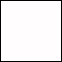
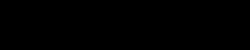

In [52]:
net.picture()

Let's train!

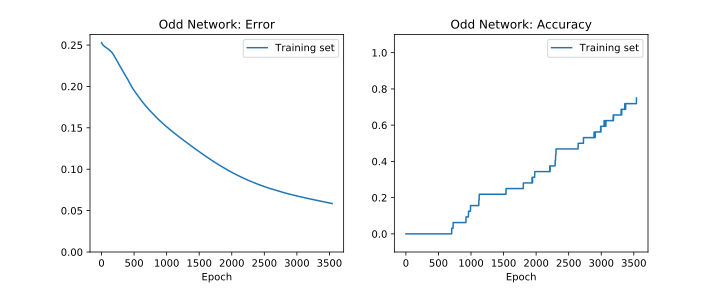

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 3541 |   0.05856 |   0.75000 


In [53]:
net.train(epochs=5000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

Let's evaluate our network.

In [54]:
net.evaluate(tolerance=.2, show=True)

Odd Network:
All Data Results:
---+-----------------+--------+------+---------+-
   |                 | target |      |         | 
 # |           input | output | loss |     acc | 
---+-----------------+--------+------+---------+-
 0 | [0.00, 0.00,... | [0.00] | 0.00 | correct | 
 1 | [0.00, 0.00,... | [1.00] | 0.00 | correct | 
 2 | [0.00, 0.00,... | [1.00] | 0.00 | correct | 
 3 | [0.00, 0.00,... | [0.00] | 0.03 | correct | 
 4 | [0.00, 0.00,... | [1.00] | 0.01 | correct | 
 5 | [0.00, 0.00,... | [0.00] | 0.01 | correct | 
 6 | [0.00, 0.00,... | [0.00] | 0.01 | correct | 
 7 | [0.00, 0.00,... | [1.00] | 0.01 | correct | 
 8 | [0.00, 1.00,... | [1.00] | 0.03 | correct | 
 9 | [0.00, 1.00,... | [0.00] | 0.03 | correct | 
10 | [0.00, 1.00,... | [0.00] | 0.00 | correct | 
11 | [0.00, 1.00,... | [1.00] | 0.03 | correct | 
12 | [0.00, 1.00,... | [0.00] | 0.02 | correct | 
13 | [0.00, 1.00,... | [1.00] | 0.01 | correct | 
14 | [0.00, 1.00,... | [1.00] | 0.01 | correct | 

... skipping some 

## Example \#4

Now let's work with a wines dataset and build and train a network to become a wine *connaisseur*!

<br />
<center>
<img src =ipynb.images/wine-connoisseur.jpg width = 500 />
</center>

In [55]:
import pandas as pd
import numpy as np
wines = pd.read_csv('data/winequality-red.csv',header=None)
wines.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
9,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7


In [57]:
len(wines)

1600

`Labels` is what we're trying to *predict*:

In [58]:
labels = wines.loc[:,11].values
labels[0:100]

array(['quality', '5', '5', '5', '6', '5', '5', '5', '7', '7', '5', '5',
       '5', '5', '5', '5', '5', '7', '5', '4', '6', '6', '5', '5', '5',
       '6', '5', '5', '5', '5', '6', '5', '6', '5', '6', '5', '6', '6',
       '7', '4', '5', '5', '4', '6', '5', '5', '4', '5', '5', '5', '5',
       '5', '6', '6', '5', '6', '5', '5', '5', '5', '6', '5', '5', '7',
       '5', '5', '5', '5', '5', '5', '6', '6', '5', '5', '4', '5', '5',
       '5', '6', '5', '4', '5', '5', '5', '5', '6', '5', '6', '5', '5',
       '5', '5', '6', '5', '5', '4', '6', '5', '5', '5'], dtype=object)

How many distinct categories? Let's use a python `set`, which removes duplicates, to look at the diversity of our data.

In [59]:
set(labels)

{'3', '4', '5', '6', '7', '8', 'quality'}

Let's remove the title (`quality`).

In [60]:
labels = wines.loc[1:, 11].values.astype(float)
labels[0:100]

array([5., 5., 5., 6., 5., 5., 5., 7., 7., 5., 5., 5., 5., 5., 5., 5., 7.,
       5., 4., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 6., 5., 6.,
       5., 6., 6., 7., 4., 5., 5., 4., 6., 5., 5., 4., 5., 5., 5., 5., 5.,
       6., 6., 5., 6., 5., 5., 5., 5., 6., 5., 5., 7., 5., 5., 5., 5., 5.,
       5., 6., 6., 5., 5., 4., 5., 5., 5., 6., 5., 4., 5., 5., 5., 5., 6.,
       5., 6., 5., 5., 5., 5., 6., 5., 5., 4., 6., 5., 5., 5., 6.])

Let's simplify our labels by having them start at 0.

In [61]:
labels2 = map(lambda x: x - 3, labels)
labels2 = list(labels2)
set(labels2)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

Now let's look at the independent variables:

In [62]:
train = wines.loc[1:,:10].values.astype(float)
np.shape(train)

(1599, 11)

Let's build our network with one hidden layer of 14 neurons. The input layer is composed of neurons numbering the number of independent variables: 11. 
And the output layer is composed of neurons numbering the range of our categorical label.

In [63]:
#from calysto.ai.conx import *

#wine_net = Network()
#wine_net.addLayers(11, 14, 6) #input -11, hidden-14, output-5
#wine_net

In [64]:
import conx as cx

wine = cx.Network("Wine Network")
wine.add(cx.Layer("input", 11))
wine.add(cx.Layer("hidden", 14, activation="relu"))
wine.add(cx.Layer("output", 6, activation="sigmoid"))
wine.connect()
wine.compile(error="mse", optimizer="adam")
wine.summary()

C:\Users\liaoz\Anaconda3\lib\site-packages\keras\layers\core.py:690: UserWarning: `output_shape` argument not specified for layer lambda_7 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 11)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 11)                0         
_________________________________________________________________
hidden (Dense)               (None, 14)                168       
_________________________________________________________________
output (Dense)               (None, 6)                 90        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________



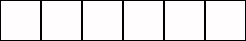

In [65]:
wine.picture()

In [66]:
wine.propagate(input= [6.9, 0.605, 0.12, 10.7, 0.073, 40, 83, 0.9993, 3.45, 0.52, 9.4])

[0.9999927282333374, 0.9943628907203674, 1.0, 1.0, 1.0, 0.9496673345565796]

To see how an untrained network works on the wine problem, let's propagate the input activations for each input pattern:

In [67]:
for item in train[:10]:
    for pattern in [item]:
        print(pattern, wine.propagate(input=pattern), '\n')

[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ] [0.974499523639679, 0.6731902360916138, 0.9999970197677612, 0.999995768070221, 0.9956420063972473, 0.14518700540065765] 

[ 7.8     0.88    0.      2.6     0.098  25.     67.      0.9968  3.2
  0.68    9.8   ] [0.9997957944869995, 0.9955715537071228, 1.0, 1.0, 0.9999988675117493, 0.8813628554344177] 

[7.80e+00 7.60e-01 4.00e-02 2.30e+00 9.20e-02 1.50e+01 5.40e+01 9.97e-01
 3.26e+00 6.50e-01 9.80e+00] [0.9983910918235779, 0.9444621205329895, 1.0, 1.0, 0.9999828934669495, 0.5362122058868408] 

[11.2    0.28   0.56   1.9    0.075 17.    60.     0.998  3.16   0.58
  9.8  ] [0.9995520114898682, 0.9608463048934937, 1.0, 1.0, 0.9999942779541016, 0.5333375930786133] 

[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ] [0.974499523639679, 0.6731902360916138, 0.9999970197677612, 0.999995768070221, 0.9956420063972473, 0.14518700540065765] 

[ 7.4     0.66    0.      1.8 

Since the output consists of 6 distinct cateogries, the classical way of handling this is with ***6 output nodes***.  

So we need a 6-dimensional vector or outputs. So we ***one-hot encode*** the output variable.

One hot encoding takes a **categorical variable** and re-encodes it as a **binary variable** in multiple dimensions. 
You'll see this often in Machine Learning algorithms, and we saw this together in our weather dataset that we used with
our random forest modeling in the beginning of the semester!

| week |
|------|
| Mon  |
| Tue  |
| Wed  |
| Thu  |
| Fri  |

and converts it into:

| Mon | Tue | Wed | Thu | Fri |
|-----|-----|-----|-----|-----|
| 1   | 0   | 0   | 0   | 0   |
| 0   | 1   | 0   | 0   | 0   |
| 0   | 0   | 1   | 0   | 0   |
| 0   | 0   | 0   | 1   | 0   |
| 0   | 0   | 0   | 0   | 1   |

Let's one-hot encode using `pandas`, and verify we did ok by adding the categorical variable as a column right next to the encoding for it.

In [68]:
# One-hot encode categorical features
labels3 = pd.get_dummies(labels2)
view = labels3.head(20)
view['val'] = labels2[:20]
view

C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,0.0,1.0,2.0,3.0,4.0,5.0,val
0,0,0,1,0,0,0,2.0
1,0,0,1,0,0,0,2.0
2,0,0,1,0,0,0,2.0
3,0,0,0,1,0,0,3.0
4,0,0,1,0,0,0,2.0
5,0,0,1,0,0,0,2.0
6,0,0,1,0,0,0,2.0
7,0,0,0,0,1,0,4.0
8,0,0,0,0,1,0,4.0
9,0,0,1,0,0,0,2.0


This is what our labels look like (5-dimensional):

In [69]:
labels3.values

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

This is what our training data looks like (11-dimensional):

In [70]:
train[:10]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.400e+00, 6.600e-01, 0.000e+00, 1.800e+00, 7.500e-02, 1.300e+01,
        4.000e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.900e+00, 6.000e-01, 6.000e-02, 1.600e+00, 6.900e-02, 1.500e+01,
        5.900e+01, 9.964e-01, 3.300e+00, 4.600e-01, 9.400e+00],
       [7.300e+00, 6.500e-01, 0.00

In [71]:
list((labels3.values)[0])

[0, 0, 1, 0, 0, 0]

Now let's build our dataset as a list of `(input, label)` pairs:

In [72]:
list(zip(train, labels3.values))
patterns = []

for i in range(0, len(train)):
    #inputs = list(np.vectorize(int)(train[i]))
    inputs = list(train[i])
    targets = list((labels3.values)[i])
    patterns.append((inputs, targets))
    
patterns[0:2]

[([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],
  [0, 0, 1, 0, 0, 0]),
 ([7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8],
  [0, 0, 1, 0, 0, 0])]

Let's load our dataset:

In [73]:
#wine.setInputs(train)
#wine.setOutputs(labels2)
wine.dataset.load(patterns)

Let's train.

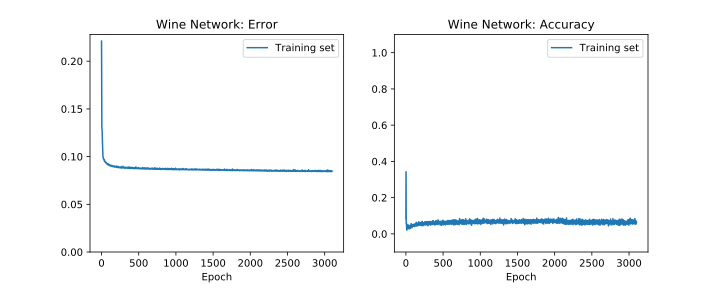

In [ ]:
wine.reset()
wine.train(epochs=5000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

Oh oh... We don't seem to converge! Looks like one hidden layer *is not enough*!

Let's try another network architecture with an extra hidden layer. So let's reduce the number of neurons in the old 
single hidden layer, to two layers, with 9 neurons for the first layer and 7 for the second.

In [ ]:
wine2 = cx.Network("Wine Network Number 2")
wine2.add(cx.Layer("input", 11))
wine2.add(cx.Layer("hidden1", 9, activation="relu"))
wine2.add(cx.Layer("hidden2", 7, activation="relu"))
wine2.add(cx.Layer("output", 6, activation="sigmoid"))
wine2.connect()
wine2.compile(error="mse", optimizer="adam")
wine2.summary()

In [ ]:
wine2.picture()

In [ ]:
wine2.propagate(input= [6.9, 0.605, 0.12, 10.7, 0.073, 40, 83, 0.9993, 3.45, 0.52, 9.4])

In [ ]:
wine2.dataset.load(patterns)

In [ ]:
wine2.reset()
wine2.train(epochs=2000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

# Results

Heck, we don't seem to be able to learn the signal we're after. 

<br />
<center>
<img src="ipynb.images/transmogrifier.png" width=600 />
</center>

Can you fix this?

## Plotting knowledge

It is important, in doing your homework, that you understand what is going on. In the wines dataset, we have 11 
independent variables (columns [0] to [10]), and one depedent variable (quality). A neural network graph is used,
through the processes of `feedfoward` and `backpropagation`, to plot an ***11-dimensional surface*** (also called a 
[manifold](https://en.wikipedia.org/wiki/Manifold)) that is copletely triangulated. 

Remember our bunny?

Here we draw a bunny point cloud in 3D that we present to a neural network graph to ***train on***. The $x$ and $y$ coordinates
are the **independent variables**, and the $z$ coordinate is the dependent variable. We want to build a model *relating*
$(x,y)$ to $z$. This is called classification. We are classifying $(x, y)$ tuples into a $z$ coordinate. So here is our 
"*excel spreadsheet*", which we can visualize as a point cloud:

In [ ]:
import meshplot as mp

data = np.load('data/data.npz')
v, f, n, fs = data["v"], data["f"], data["n"], data["fs"]
v1, f1, v2, f2 = data["v1"], data["f1"], data["v2"], data["f2"]
mp.plot(v)

Those are the "***datapoints***" the graph needs to learn. But instead of learning these datapoints, the graph ***learns***
an entire triangulated manifold that looks like this, extrapolating information to fill-in the empty space in the bunny
point cloud:

In [ ]:
mp.plot(v, f)

So now when you have to ***predict*** a datapoint, say you have to predict some $z$ coordinate given only some $x$ and $y$ coordinates, 
you can just feedforward the $x$ and $y$ values through your neural network, intersecting the $(x,y)$ plane with the bunny manifold,
yielding $z$!

In other words, the ***input*** to your neural network graph is the bunny point cloud, and the result (by backpropagation, stored in the weights
of the neural network) is the mesh-tiangulated bunny ***surface***, which allows you to do predictions on missing values inside 
$(x, y, z)$ triples.

Artificial neural networks, just like your brain, are ***geometry engines***, experiencing reality as ***point-clouds*** of data,
and building ***triangulated surface*** models, using the weights in the synapses of your brain or the nodes of your ANN.

>**NOTE**: We did exactly the same thing in the beginning of the semester, when we built **pdf*** models out of samples of
distributions we generated with a little bit of help from NumPy. The gaussian, Beta, Gamma functions ***interpolate*** the
empty space between our sample dataponts, giving us a *continuous* curve that we can use to do predictions with.

The only mystery is how backpropagation is done in your brain. As far as ANNs are concerned, we solves that problem in our
previous notebook: using gradients.

Now, our wines dataset is really 12-dimensional (11 independent variables and one label). So how can we exactly plot a 
12-dimensional manifold?

## Principal component analysis
[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) essentially does something
similar to finding eigenvectors of a linear map, expect it does this from an information-theoretic perspective rather
than a geometric perspective. It finds the directions of an excel spreadsheeet where ***data varies the most*** and ranks
them. It then returns the first one, the second one, as many as you want. 

But if you have a physical process underlying a dataset (the model, really), then most of the time the data varies the most
on a smaller number of directions, and the other ones are mostly random noise. So, PCA is a dimensionality reduction
technique that can be used to find lower-dimensional spaes that contain the ***essential information***.

>**NOTE**: Ask me about my famous aquarium analogy!

So let's do a PCA on our 11-dimensional data, and plot the 3 principal components. I call this our "**bunny graph**".

In [ ]:
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

In [ ]:
#import numpy as np
#wines.drop(['P1', 'P2', 'P3', 'P4'], axis=1, inplace=True)
#wines.drop(columns=['P1', 'P2', 'P3', 'P4'], inplace=True)

In [ ]:
features = wines.loc[1:,:10].values.astype(float)

In [ ]:
import numpy as np

pca = PCA(n_components = 3)
pca.fit(features)
p = pca.transform(features)

wines['P1'] = np.zeros(len(wines))
wines['P1'][0] = "First principal component"
wines['P1'][1:] = p[:,0]

wines['P2'] = np.zeros(len(wines))
wines['P2'][0] = "Second principal component"
wines['P2'][1:] = p[:,1]

wines['P3'] = np.zeros(len(wines))
wines['P3'][0] = "Third principal component"
wines['P3'][1:] = p[:,2]

wines.head()

In [ ]:
classes = set(wines[[11]].values.flatten()[1:])
classes

Let's get rid of the first row in `wines`:

In [ ]:
wines2 = wines[1:]
wines2

Let's convert the `quality` column from a string over to integers:

In [ ]:
wines2[11] = wines2[11].astype(int)

For example, here are the better wines:

In [ ]:
wines2[wines2[11] > 5]

In [ ]:
len(wines2[wines2[11] <= 5]['P1'].values), len(wines2[wines2[11] > 5]['P1'].values)

Let's do a pairs plot of the first two principal components and see if there is a correlation between them and quality:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = [(0,.8,1),(1,.3,.2),(0,.7, .1),(.9,0,.1),(1,1,.1),(.1,.5, .9)]
plt.figure(figsize = (8,8))
plt.xlabel('P1', fontsize = 15)
plt.ylabel('P2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
i = 3
for cl, color in zip(classes,colors):
    P1 = wines2[wines2[11] == i]['P1'].values
    P2 = wines2[wines2[11] == i]['P2'].values
    plt.scatter(P2, P1, c = color, s = 50)
    i += 1
plt.legend(classes)
plt.grid()

Wines of different quality are really tightly mixed into the same space, so it does not appear like a PCA deomposition
would be of big help.

Either way, it gives us an idea of the "*shape*" of the manifold we are about to train on, so I want to plot the manifold's
point cloud for you.

These are the three first principal components of our middle quality wines:

In [ ]:
p1 = wines2[wines2[11] == 6]['P1'].values
p2 = wines2[wines2[11] == 6]['P2'].values
p3 = wines2[wines2[11] == 6]['P3'].values

p1[0], p2[0], p3[0] 

Let's create the point cloud. We will divide by 10 to shrink distances so that I can actually see a shape, otherwise the
points may be too spread out apart:

In [ ]:
V = []
for i in range(0, len(p1)):
    V.append([ p1[i]/10., p2[i]/10., p3[i]/10. ])
W = np.array(V)
W

In [ ]:
len(W)

In [ ]:
mp.plot(W)

And here are *all* wines:

In [ ]:
p1 = wines2['P1'].values
p2 = wines2['P2'].values
p3 = wines2['P3'].values

In [ ]:
V = []
for i in range(0, len(p1)):
    V.append([ p1[i]/30., p2[i]/30., p3[i]/30. ])
W = np.array(V)
np.max(W)

In [ ]:
len(W)

In [ ]:
mp.plot(W)

What I'm seeing is a kind of "*corner*" structure.

So what our ANN will do is to join that data with the label, and create a "*bunny surface*" using backpropagation.

>**RECAP**: ANNs, just like your brain, are bayesian geometry engines, encoding information in mesh geometries that 
interpolate your point-cloud experiences. When you "*train*" (backpropagate) an ANN, you are building mesh-triangulated 
surfaces. When you *predict* (or think, or feedforward), you are computing intersections between your models and
evidence.

## Analogy with real neural networks

The human nervous system is composed of more than 100 billion cells known as neurons, maybe closer to 200 billion as we 
are born (and then neurons die when we are babies). Do you know how many stars are in a galaxy? How many galaxies in the 
universe? A neuron is a cell in the nervous system whose function it is to receive and transmit information. Neurons are 
made up of three major parts:

* the cell body, or **soma**, which contains the nucleus of the cell and keeps the cell alive
* a branching treelike fiber known as the **dendrite**, which collects information from other cells and sends the information to the soma
* a long, segmented fiber known as the **axon**, which transmits information away from the cell body toward other neurons or to the muscles and glands

<img src="https://c4.staticflickr.com/3/2656/4253587827_9723c3ffd3_z.jpg" />

*Photo courtesy of GE Healthcare, http://www.flickr.com/photos/gehealthcare/4253587827/ *

<img src="https://askabiologist.asu.edu/sites/default/files/resources/articles/neuron_anatomy.jpg"/>

Some neurons have thousands of connections (dendrites), and these dendrites may themselves be branched to allow the cell 
to receive information from thousands of other cells. So a human brain has an order of a hundred trillion ($10^{14}$) 
connections.

The axons are also specialized; some, such as those that send messages from the spinal cord to the muscles in the hands 
or feet, may be very long---even up to several feet in length. To improve the speed of their communication, and to keep 
their electrical charges from shorting out with other neurons, axons are often surrounded by a **myelin sheath**.

The myelin sheath is a layer of fatty tissue surrounding the axon of a neuron that both acts as an insulator and allows 
faster transmission of the electrical signal. Axons branch out toward their ends, and at the tip of each branch is a 
*terminal button*.

The actual working of neurons involves many aspects (including chemical, electrical, physical, timings). We abstract all 
of this away into three numbers:

* **activation** - a value representing the excitement of a neuron
* **default bias** - a value representing a default or bias (sometimes called a threshold)
* **weight** - a value representing a connection to another neuron

In addition, there is a **transfer function** that takes all of the incoming activations times their associated weights 
plus the bias, and squashes the resulting sum. This limits the activations from growing too big or too small.

Time is handled in discrete steps. Real cells, of course, fire in non-discrete intervals. Consider the trigeminal ganglion 
cell: this is about 2 seconds of activity that was recorded from a rat ganglion cell after a single whisker (vibrissa) was 
moved and held in position. Listen for the rapid steady burst of action potentials. This neuron was firing about 100 
action potentials every second. The picture below is the actual recording of a portion of what you are hearing...each 
action potential in this record is separated by about 10 milliseconds. There are 21 action potentials displayed in this 
picture of the recording.

<img src="https://faculty.washington.edu/chudler/gif/spikes2.gif" />

This is what your brain sounds like on the inside. Imagine 100 billion cells doing this:

In [ ]:
from IPython.display import Audio
Audio("data/sndhair.wav")

## References
Hinton, G. (1992) [How Neural Networks Learn From Experience](https://www.academia.edu/631731/How_neural_networks_learn_from_experience). Scientific American. September, 1992.